# Apple Mobility Trends
## Data Visualisation

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
#Importing the Dataset
apple = pd.read_csv('appledata.csv')
apple.head(134)

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,45.39,NaN,NaN,49.19,50.20,48.30,46.78,45.51,56.09,51.12
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,68.87,NaN,NaN,61.79,56.46,54.41,48.36,45.20,67.46,63.20
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,19.82,NaN,NaN,38.87,41.01,44.34,38.29,22.01,40.01,41.34
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,15.58,NaN,NaN,28.33,28.44,31.63,28.81,18.49,30.79,30.37
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,63.56,NaN,NaN,71.12,77.24,79.75,65.88,72.17,73.58,75.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,country/region,Switzerland,driving,Schweiz,NaN,NaN,100.0,102.35,108.16,106.47,...,81.00,NaN,NaN,91.13,89.20,94.85,92.88,97.96,101.07,104.05
130,country/region,Switzerland,transit,Schweiz,NaN,NaN,100.0,102.26,106.79,100.41,...,44.98,NaN,NaN,51.33,48.93,49.60,50.22,53.13,58.28,57.63
131,country/region,Switzerland,walking,Schweiz,NaN,NaN,100.0,107.83,116.33,115.19,...,68.26,NaN,NaN,73.34,77.18,83.22,91.23,86.25,91.26,95.24
132,country/region,Taiwan,driving,台灣|臺灣,NaN,NaN,100.0,106.97,113.81,118.64,...,96.03,NaN,NaN,87.89,94.38,122.17,118.95,98.45,80.94,81.29


In [3]:
#Extract data only for Singapore
singapore = apple[apple["region"] == 'Singapore']
singapore.head()

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-05-10,2020-05-11,2020-05-12,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19
113,country/region,Singapore,driving,NaN,NaN,NaN,100.0,101.95,103.48,112.19,...,42.86,NaN,NaN,42.48,44.11,47.99,42.49,42.77,43.19,43.42
114,country/region,Singapore,transit,NaN,NaN,NaN,100.0,98.45,96.46,105.04,...,14.49,NaN,NaN,15.11,15.28,16.09,15.17,16.76,16.11,16.29
115,country/region,Singapore,walking,NaN,NaN,NaN,100.0,104.42,104.79,110.50,...,29.52,NaN,NaN,29.40,30.30,34.17,31.67,30.82,29.73,29.48


In [4]:
#Drop some columns that are unnecessary and drop NaN Values
singapore = singapore.drop(['geo_type', 'region', 'alternative_name', 'sub-region', 'country', '2020-05-11', '2020-05-12'], axis = 1)
singapore.head()

,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,...,2020-05-08,2020-05-09,2020-05-10,2020-05-13,2020-05-14,2020-05-15,2020-05-16,2020-05-17,2020-05-18,2020-05-19
113,driving,100.0,101.95,103.48,112.19,124.68,107.62,100.58,104.77,104.16,...,44.61,45.58,42.86,42.48,44.11,47.99,42.49,42.77,43.19,43.42
114,transit,100.0,98.45,96.46,105.04,120.40,107.33,93.66,92.37,92.08,...,14.58,13.82,14.49,15.11,15.28,16.09,15.17,16.76,16.11,16.29
115,walking,100.0,104.42,104.79,110.50,133.23,122.37,100.68,98.06,101.62,...,33.30,34.56,29.52,29.40,30.30,34.17,31.67,30.82,29.73,29.48


In [5]:
singaporeTransposed = singapore.transpose()

# Delete row at index position 0 & 1
singaporeTransposed = singaporeTransposed.drop([singaporeTransposed.index[0]])
#Rename Column Index
singaporeTransposed.columns = [ 'Driving', 'Transit', 'Walking']
singaporeTransposed.head()

,Driving,Transit,Walking
2020-01-13,100,100,100
2020-01-14,101.95,98.45,104.42
2020-01-15,103.48,96.46,104.79
2020-01-16,112.19,105.04,110.5
2020-01-17,124.68,120.4,133.23


In [6]:
#Save to CSV for easier editing (commented out since it's done)
#singaporeTransposed.to_csv('singaporeMobility.csv')

In [7]:
singaporeClean = pd.read_csv('singaporeMobility.csv')
singaporeClean.head()

,Date,Driving,Transit,Walking
0,2020-01-13,100.00,100.00,100.00
1,2020-01-14,101.95,98.45,104.42
2,2020-01-15,103.48,96.46,104.79
3,2020-01-16,112.19,105.04,110.50
4,2020-01-17,124.68,120.40,133.23


In [8]:
print(singaporeClean.shape)

(126, 4)


In [9]:
#Set size of figure
plt.figure(figsize=(19, 10))
#Make Time Series Plot for Driving against Date
ax = sb.lineplot(x = 'Date', y = 'Driving', data = singapore)
#Remove messy date on axis
ax.set_xticks([])

In [10]:
#Set size of figure
plt.figure(figsize=(19, 10))
#Make Time Series Plot for Date
singaporeRemoved = singapore.drop('Date', axis = 1)
ax = sb.lineplot(data = singaporeRemoved)
#Remove messy date on axis
ax.set_xticks([])

---
### Using Altair

In [15]:
singaporeLong = singaporeClean.melt('Date', var_name='Method', value_name='Percentage')

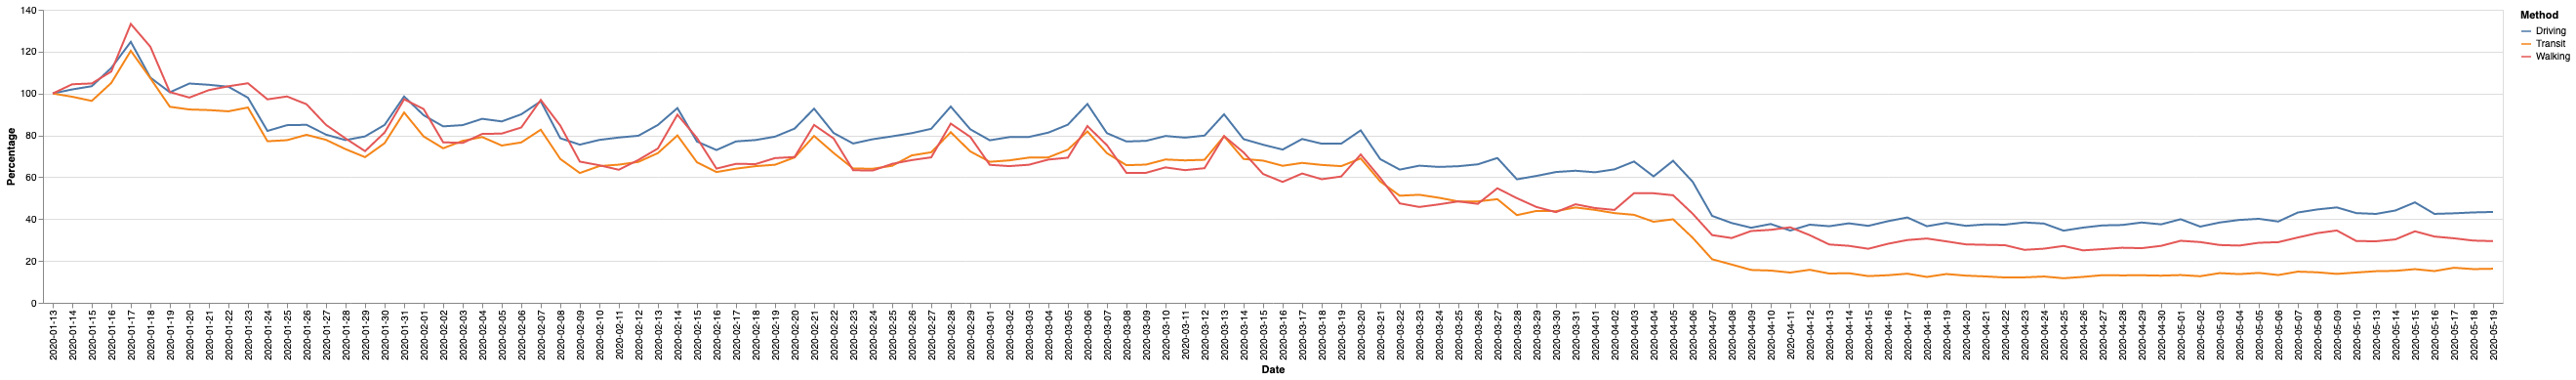

In [19]:
#Using Altair for Lineplot of all three
alt.Chart(singaporeLong).mark_line().encode(
    x = 'Date',
    y = 'Percentage',
    color = 'Method'
)